In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as stats #统计模块
import scipy
#import pymysql #导入数据库模块

from datetime import datetime #时间模块
import statsmodels.formula.api as smf # OLS regression

import matplotlib.pyplot as plt #画图模块
import matplotlib.dates as mdates #日期格式处理模块
from matplotlib import style #自定义图表风格

from matplotlib.font_manager import FontProperties #作图中文
from pylab import mpl #画图自定义字体
#mpl.rcParams['font.sans-serif']=['SimHei']#指定默认字体
#mpl.rcParams['font.family']='Times New Roman'#指定默认字体

#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format='svg' #提高分辨率

from IPython.core.interactiveshell import InteractiveShell #jupyter运行输出的模块
#显示每一个运行的结果
InteractiveShell.ast_node_interactivity='all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv("D:/homework/000001.csv")
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.050,99.980,95.790,99.980,126000.00,4.940000e+05
1990-12-20,99.98,104.300,104.390,99.980,104.390,19700.00,8.400000e+04
1990-12-21,104.39,109.070,109.130,103.730,109.130,2800.00,1.600000e+04
1990-12-24,109.13,113.570,114.550,109.130,114.550,3200.00,3.100000e+04
1990-12-25,114.55,120.090,120.250,114.550,120.250,1500.00,6.000000e+03
...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07


In [3]:
data_new=data['1995-01':'2024-09'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose']=pd.to_numeric(data_new['Preclose'])
#计算000001上证指数日收益率 两种：
data_new['Raw_return']=data_new['Close']/data_new['Preclose']-1
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return
Day,,,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,23451800.00,1.806930e+08,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,42222000.00,3.069230e+08,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,43012300.00,3.015330e+08,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,48748200.00,3.537580e+08,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,50985100.00,3.985190e+08,-0.023035
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


In [4]:
Month_data=data_new.resample('ME')['Raw_return'].apply(lambda x:(1+x).prod()-1).to_frame()
Month_data

,Raw_return
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


# Data Filter 数据节选

# 数据的缩尾\截尾

### 固定比率法
- 截尾：删除超过99%（95%）分位数的数据，删除小于1%（5%）分位数的数据
- 缩尾：把超过99%分位数的数据，替换为99%分位数；小于1%分位数的数据，替换为1%分位数

In [5]:
Month_data['2000-01':'2024-09']['Raw_return'].max()
Month_data['2000-01':'2024-09']['Raw_return'].min()

np.float64(0.2744642236184609)

np.float64(-0.2463139446677537)

In [6]:
Month_data_fix = Month_data['2000-01':'2024-09'].copy()
Month_data_fix

,Raw_return
Day,
2000-01-31,0.123242
2000-02-29,0.116990
2000-03-31,0.049948
2000-04-30,0.020053
2000-05-31,0.031710
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [7]:
Month_data_fix[Month_data_fix['Raw_return']>Month_data_fix['Raw_return'].quantile(0.99)]=Month_data_fix['Raw_return'].quantile(0.99)
Month_data_fix[Month_data_fix['Raw_return']<Month_data_fix['Raw_return'].quantile(0.01)]=Month_data_fix['Raw_return'].quantile(0.01)
Month_data_fix

,Raw_return
Day,
2000-01-31,0.123242
2000-02-29,0.116990
2000-03-31,0.049948
2000-04-30,0.020053
2000-05-31,0.031710
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


In [8]:
Month_data['Raw_return'].describe().round(6)
Month_data_fix['Raw_return'].describe().round(6)

count    357.000000
mean       0.007448
std        0.076004
min       -0.246314
25%       -0.039178
50%        0.004296
75%        0.046311
max        0.320558
Name: Raw_return, dtype: float64

count    297.000000
mean       0.005365
std        0.068627
min       -0.203684
25%       -0.037767
50%        0.004454
75%        0.043145
max        0.185927
Name: Raw_return, dtype: float64

# 参数假设检验

投资组合Portfolio的表现如何？
- $H_0: R = 0$
- $H_1 : R \neq 0$

我们希望拒接上面的$H_0: R= 0$,接受$R \neq 0$。
在统计结果里面，我们希望看到pvalue越小约好，也就是犯错的概率越小越好。对应的statistic（t值）越大越好。

In [9]:
stats.ttest_1samp(Month_data['2000-01':]['Raw_return'],0)

TtestResult(statistic=np.float64(1.3453254245037998), pvalue=np.float64(0.17954988199447114), df=np.int64(296))

In [10]:
np.mean(Month_data['2000-01':]['Raw_return'])

np.float64(0.005529580266316066)

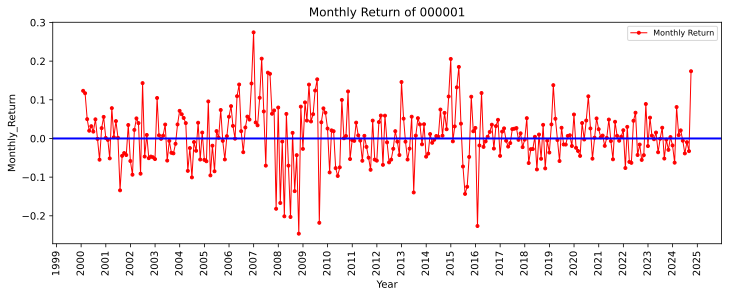

In [11]:
fig, ax = plt.subplots(figsize = (12,4))

ax.plot('Raw_return', # 图片数据
'.-', # 图片类型,
color = 'r', # 图片颜色
label = 'Monthly Return', # 图片标签
linewidth = 1, # 图片线宽
data = Month_data['2000-01':]) # 图片数据来源
ax.set_title("Monthly Return of 000001") # 图片标题
ax.set_ylabel('Monthly_Return') # 图片y轴标签
ax.set_xlabel('Year') # 图片x轴标签

# 添加一条y=0的参考线
plt.axhline(y=0, color='blue', linewidth=2)

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator(1))

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

# 添加图例
plt.legend(loc='upper right',fontsize = 8)
plt.show();


# 一些其他图像示例

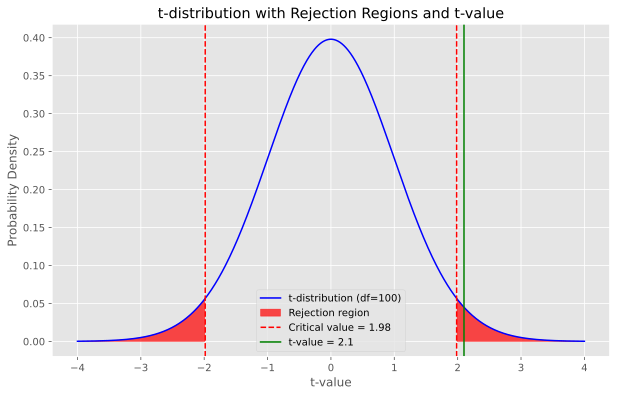

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 设置参数
alpha = 0.05  # 显著性水平
df = 100  # 自由度，假设样本量为101
t_crit = stats.t.ppf(1 - alpha / 2, df)  # 双侧检验临界值

# 生成 t 分布的 x 轴数据
x = np.linspace(-4, 4, 1000) # 生成 -4 到 4 之间的 1000 个数据
y = stats.t.pdf(x, df) # 计算 t 分布的概率密度函数

# 绘制 t 分布曲线
plt.figure(figsize=(10, 6)) # 设置图形大小
plt.style.use('ggplot') # 设置风格
plt.plot(x, y, label=f't-distribution (df={df})', color='blue') # 绘制 t 分布曲线

# 填充拒绝原假设区域
plt.fill_between(x, 0, y, where=(x >= t_crit) | (x <= -t_crit), color='red', alpha=0.7, label='Rejection region')

# 标出 t 临界值
plt.axvline(t_crit, color='red', linestyle='--', label=f'Critical value = {t_crit:.2f}') # 标出临界值
plt.axvline(-t_crit, color='red', linestyle='--') # 标出临界值

# 假设计算出的 t 值 (例如 t = 2.1)
t_value = 2.1
plt.axvline(t_value, color='green', linestyle='-', label=f't-value = {t_value}')

# 图形标注
plt.title('t-distribution with Rejection Regions and t-value')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend()

# 显示图形
plt.show();

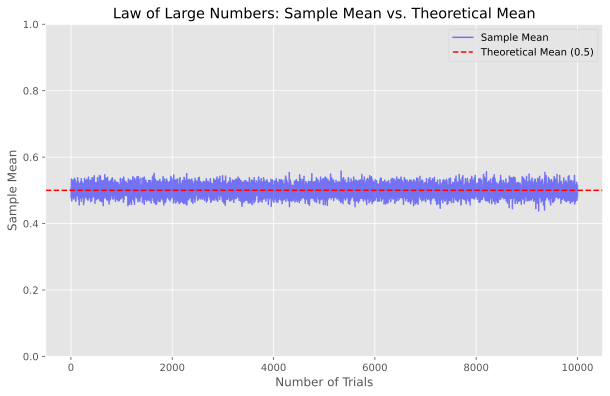

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 设置参数
num_trials = 10000  # 总实验次数
num_samples = 1000  # 每次实验的样本大小
results = []  # 存储每次实验的均值

# 模拟实验
for _ in range(num_trials):
    # 抛掷硬币，0代表正面，1代表反面
    samples = np.random.binomial(n=1, p=0.5, size=num_samples) # 二项分布
    results.append(np.mean(samples))  # 计算均值并存储

# 计算总体均值
theoretical_mean = 0.5  # 理论均值（正面概率）

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_trials + 1), results, label='Sample Mean', color='blue', alpha=0.5)
plt.axhline(y=theoretical_mean, color='red', linestyle='--', label='Theoretical Mean (0.5)')
plt.title('Law of Large Numbers: Sample Mean vs. Theoretical Mean')
plt.xlabel('Number of Trials')
plt.ylabel('Sample Mean')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # 限制 y 轴范围
plt.show();

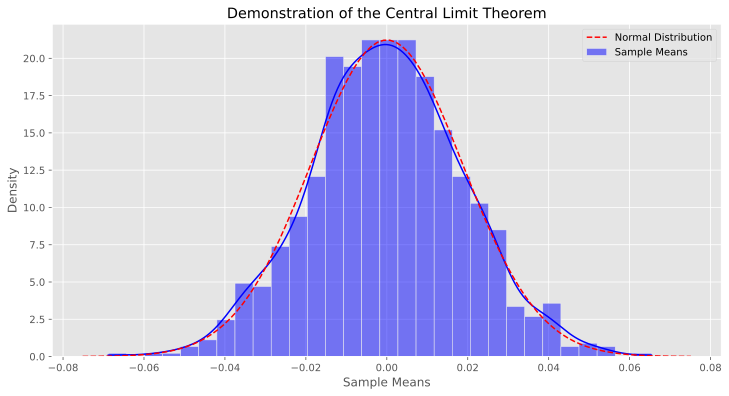

In [15]:
import seaborn as sns

# 设置参数
num_samples = 1000  # 每次抽样的样本大小
num_trials = 1000   # 抽样的次数
sample_means = []   # 存储样本均值

# 从非正态分布（例如均匀分布）中抽样
for _ in range(num_trials):
    samples = np.random.uniform(low=-1, high=1, size=num_samples)  # 生成均匀分布样本
    sample_means.append(np.mean(samples))  # 计算均值并存储

# 绘制结果
plt.figure(figsize=(12, 6))

# 绘制样本均值的分布
sns.histplot(sample_means, bins=30, kde=True, color='blue', stat='density', label='Sample Means')

# 绘制标准正态分布
mu = np.mean(sample_means)
sigma = np.std(sample_means)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red', linestyle='--', label='Normal Distribution')

# 图形标注
plt.title('Demonstration of the Central Limit Theorem')
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show();